In [ ]:
import os
import numpy as np
import itertools

import pandas as pd
import tensorflow

import tensorflow as tf
import keras

import random
import math

from keras.models import Sequential       #to define model/ layers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

from sklearn.metrics import confusion_matrix

# To Explore the images
from IPython.display import display
from keras.preprocessing.image import array_to_img

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import cifar10


In [ ]:
# Define the class labels for CIFAR-10
class_labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Set random seed for reproducibility
np.random.seed(42)

# Shuffle the training data indices
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)

# Set the validation split size (5,000 images)
validation_size = 5000
train_size = len(x_train) - validation_size

# Split the data into training and validation sets
x_train, x_val = x_train[indices[:train_size]], x_train[indices[train_size:]]
y_train, y_val = y_train[indices[:train_size]], y_train[indices[train_size:]]

#normalize
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

#image flipping
def random_flip(image, label):
    image = tf.image.random_flip_left_right(image)
    return image, label

# Now you can use TensorFlow Data API or Keras for model training
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64).shuffle(10000)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(64) # Define val_dataset first
val_dataset = val_dataset.map(random_flip) # Then apply the random_flip transformation
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

# Display class labels for the first 5 training samples
print("Class labels for the first 5 samples in the training set:")
for i in range(5):
    class_label = class_labels[int(y_train[i])]
    print(f"Image {i+1} - Class: {class_label} ({y_train[i][0]})")

print(f"Training data size: {x_train.shape[0]}")
print(f"Validation data size: {x_val.shape[0]}")
print(f"Test data size: {x_test.shape[0]}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Class labels for the first 5 samples in the training set:
Image 1 - Class: horse (7)
Image 2 - Class: ship (8)
Image 3 - Class: airplane (0)
Image 4 - Class: frog (6)
Image 5 - Class: automobile (1)
Training data size: 45000
Validation data size: 5000
Test data size: 10000


<ipython-input-3-899404c3d3e2>:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_label = class_labels[int(y_train[i])]


In [ ]:
number_of_images, x, y, c = x_train.shape
print(f'Number of images = {number_of_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

Number of images = 45000 	| width = 32 	| height = 32 	| channels = 3


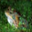

In [ ]:
pic = array_to_img(x_train[3])
display(pic)

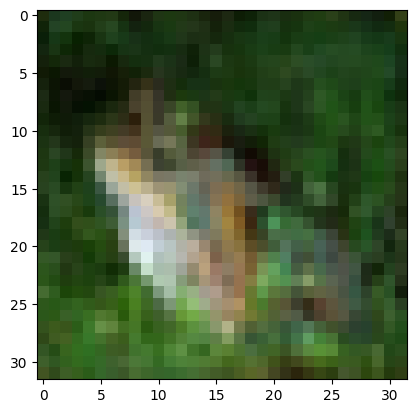

In [ ]:
plt.imshow(x_train[3])

In [ ]:
# Create a DataFrame from the class_labels dictionary
class_labels_df = pd.DataFrame(list(class_labels.items()), columns=['Label ID', 'Class Label'])

# Display the DataFrame as a table
display(class_labels_df)

,Label ID,Class Label
0,0,airplane
1,1,automobile
2,2,bird
3,3,cat
4,4,deer
5,5,dog
6,6,frog
7,7,horse
8,8,ship
9,9,truck


<ipython-input-10-6a92fa784f77>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_labels[int(y_train[i])])


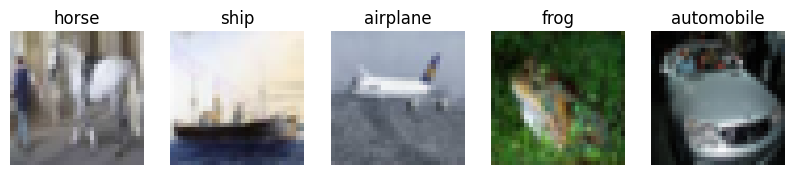

In [ ]:
# prompt: display the first 5 images in the training set and show their labels

# Display the first 5 images in the training set
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_labels[int(y_train[i])])
    plt.axis('off')
plt.show()

In [ ]:
# prompt: show the activation function in this code

The code uses two activation functions:

1. **ReLU (Rectified Linear Unit):**  Used in the convolutional layers.  `activation='relu'`

2. **Softmax:** Used in the final dense layer for classification. `activation='softmax'`


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 79ms/step - accuracy: 0.3494 - loss: 1.7692 - val_accuracy: 0.5166 - val_loss: 1.3494
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 75ms/step - accuracy: 0.5449 - loss: 1.2771 - val_accuracy: 0.5782 - val_loss: 1.2159
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 68s 97ms/step - accuracy: 0.6087 - loss: 1.1163 - val_accuracy: 0.6064 - val_loss: 1.1269
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 66s 73ms/step - accuracy: 0.6495 - loss: 1.0016 - val_accuracy: 0.6230 - val_loss: 1.1029
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 76ms/step - accuracy: 0.6764 - loss: 0.9271 - val_accuracy: 0.6562 - val_loss: 0.9963
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.7076 - loss: 0.8334 - val_accuracy: 0.6598 - val_loss: 1.0065
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.7321 - loss: 0.7680 - val_accuracy: 0.6768 - val_loss: 0.9594
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 50s 71ms/step - accuracy: 0.7496 - loss: 0.7146 - 

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 676,832 (2.58 MB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 451,222 (1.72 MB)

In [ ]:
# Assuming 'history' is the training history object from model.fit
pd.DataFrame(history.history).describe()

,accuracy,loss,val_accuracy,val_loss
count,14.000000,14.000000,14.000000,14.000000
mean,0.722373,0.791238,0.641186,1.093158
std,0.120624,0.333259,0.054658,0.115936
min,0.442111,0.381183,0.490400,0.971176
25%,0.663378,0.543914,0.635600,1.016546
50%,0.746700,0.727675,0.659000,1.065322
75%,0.811061,0.965020,0.675350,1.129390
max,0.867911,1.547125,0.684800,1.414652


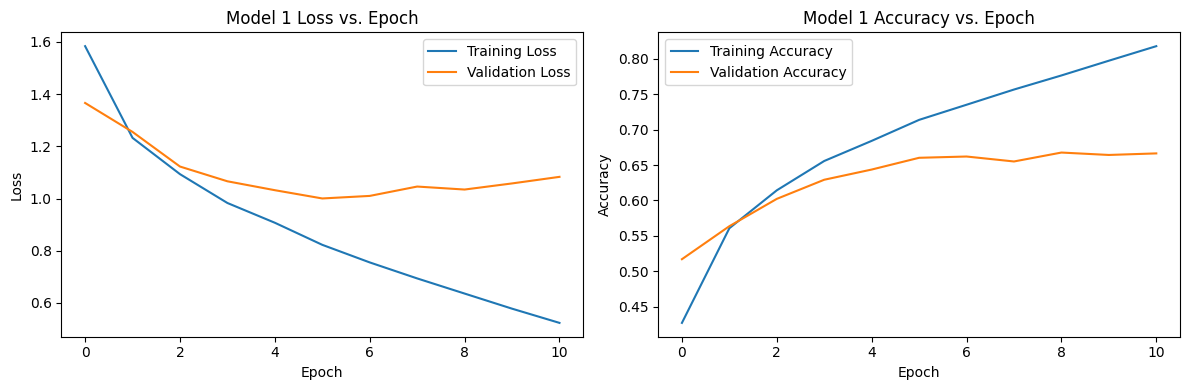

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model 1 Loss vs. Epoch')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model 1 Accuracy vs. Epoch')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: create a second model using 10 epochs, and batch size 32


model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model2.add(MaxPool2D(pool_size=(3, 3)))
model2.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model2.add(MaxPool2D(pool_size=(3, 3)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))


model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=10)
y_val_encoded = to_categorical(y_val, num_classes=10)

history2 = model2.fit(
    x_train, y_train_encoded,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val_encoded)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.3061 - loss: 1.8605 - val_accuracy: 0.5044 - val_loss: 1.3760
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.5214 - loss: 1.3419 - val_accuracy: 0.5508 - val_loss: 1.2552
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.5738 - loss: 1.1989 - val_accuracy: 0.5748 - val_loss: 1.2192
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6024 - loss: 1.1121 - val_accuracy: 0.6108 - val_loss: 1.1183
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.6296 - loss: 1.0560 - val_accuracy: 0.5988 - val_loss: 1.1291
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.6554 - loss: 0.9950 - val_accuracy: 0.6044 - val_loss: 1.1395
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.6607 - loss: 0.9643 - val_accuracy: 0.6278 - val_loss: 1.0629
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.6705 -

In [ ]:
model2.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 6, 6, 32)            │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,360 (419.38 KB)

 Trainable params: 35,786 (139.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 71,574 (279.59 KB)

In [ ]:
pd.DataFrame(history2.history).describe()

,accuracy,loss,val_accuracy,val_loss
count,20.000000,20.000000,20.000000,20.000000
mean,0.668784,0.938217,0.629300,1.072198
std,0.087233,0.233038,0.044859,0.107583
min,0.391911,0.711996,0.504400,0.967288
25%,0.644922,0.776311,0.609200,0.996775
50%,0.694956,0.867188,0.642400,1.035702
75%,0.727567,1.018026,0.663050,1.121015
max,0.748200,1.649373,0.674800,1.376010


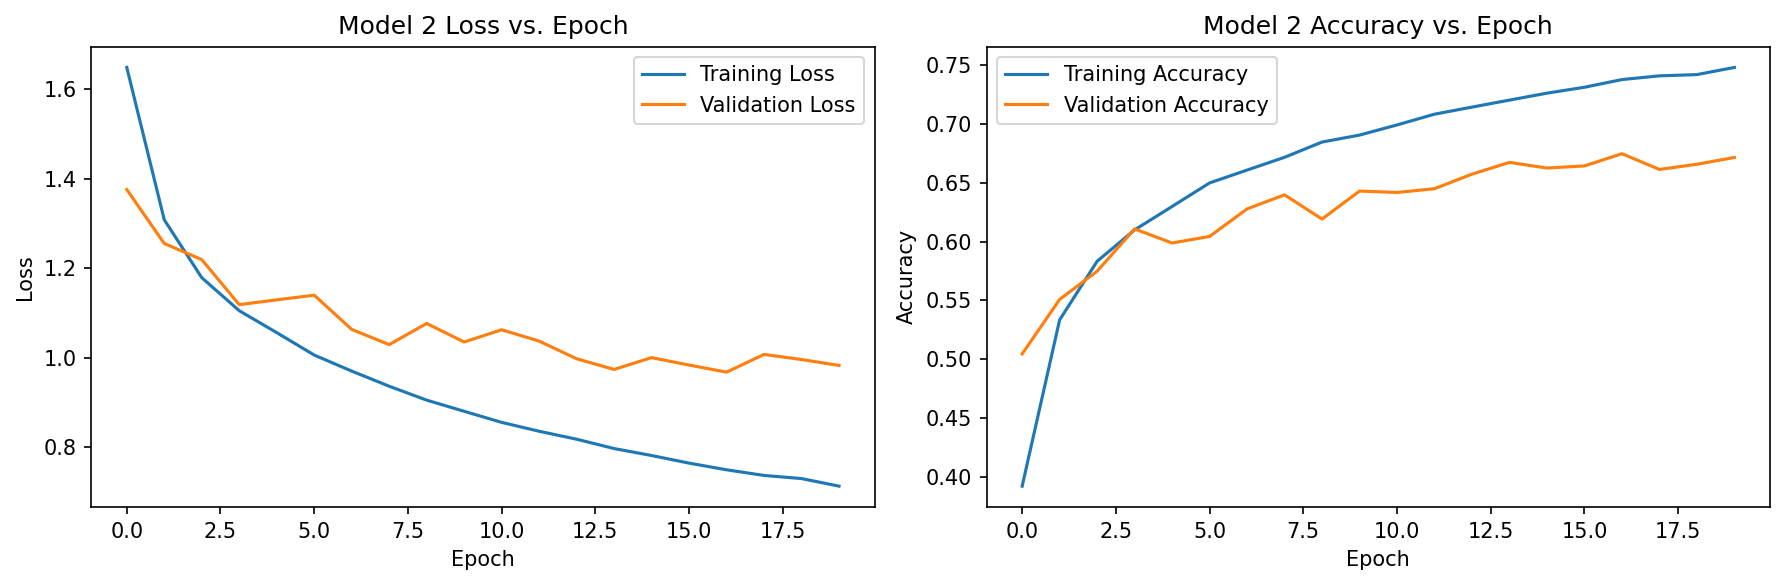

In [ ]:
# Plot the training history for model2
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model 2 Loss vs. Epoch')

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model 2 Accuracy vs. Epoch')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Model 1 Classification Report:
              precision    recall  f1-score   support

    airplane       0.66      0.80      0.72      1000
  automobile       0.80      0.80      0.80      1000
        bird       0.62      0.55      0.59      1000
         cat       0.55      0.42      0.48      1000
        deer       0.61      0.66      0.63      1000
         dog       0.65      0.57      0.61      1000
        frog       0.67      0.86      0.75      1000
       horse       0.78      0.70      0.73      1000
        ship       0.81      0.76      0.78      1000
       truck       0.75      0.80      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

Model 2 Classification Report:
              precision    recall  f1-score   support

    airplane       0.72      0.72      

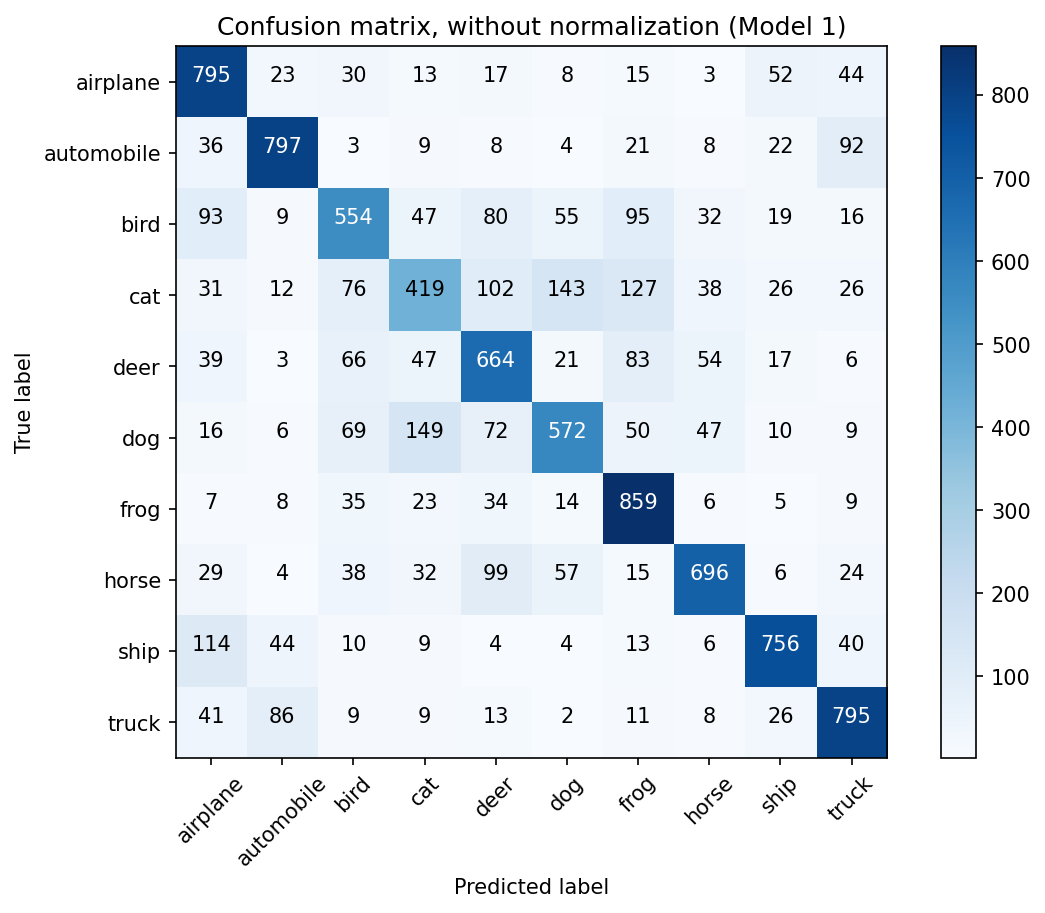

Confusion matrix, without normalization
[[725  29  69  17  18   4   9  13  77  39]
 [ 21 834  14   7   2   3  14   5  29  71]
 [ 64  18 611  42  80  46  72  37  19  11]
 [ 16  22 121 398  65 139 137  55  26  21]
 [ 30   4 103  34 613  29  64 103  12   8]
 [ 25   9 117 140  57 491  66  75   9  11]
 [  4   6  52  27  35   8 835  16   6  11]
 [ 14   8  51  22  62  45  19 743   4  32]
 [ 75  57  13   9   4   3   8   7 793  31]
 [ 29 130  11  14   5   6  15  21  30 739]]


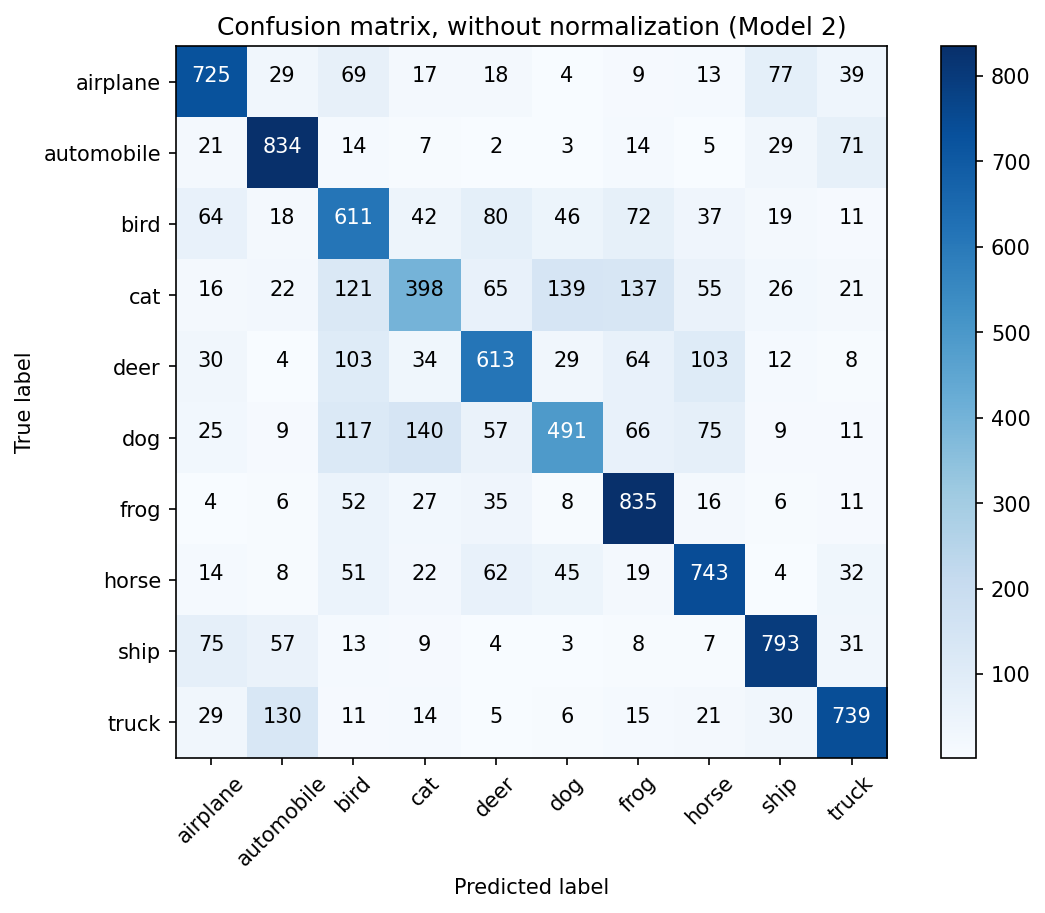

In [ ]:
# prompt: test the accuracy and precision for the first and second models, show graphs and data

from sklearn.metrics import classification_report

# Evaluate model 1
y_pred1 = np.argmax(model.predict(x_test), axis=1)
print("Model 1 Classification Report:")
print(classification_report(y_test, y_pred1, target_names=list(class_labels.values())))

# Evaluate model 2
y_pred2 = np.argmax(model2.predict(x_test), axis=1)
print("\nModel 2 Classification Report:")
print(classification_report(y_test, y_pred2, target_names=list(class_labels.values())))


# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix for model 1
cnf_matrix1 = confusion_matrix(y_test, y_pred1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix1, classes=list(class_labels.values()),
                      title='Confusion matrix, without normalization (Model 1)')
plt.show()

# Compute confusion matrix for model 2
cnf_matrix2 = confusion_matrix(y_test, y_pred2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix2, classes=list(class_labels.values()),
                      title='Confusion matrix, without normalization (Model 2)')

plt.show()

Normalized confusion matrix
[[0.8  0.02 0.03 0.01 0.02 0.01 0.01 0.   0.05 0.04]
 [0.04 0.8  0.   0.01 0.01 0.   0.02 0.01 0.02 0.09]
 [0.09 0.01 0.55 0.05 0.08 0.06 0.1  0.03 0.02 0.02]
 [0.03 0.01 0.08 0.42 0.1  0.14 0.13 0.04 0.03 0.03]
 [0.04 0.   0.07 0.05 0.66 0.02 0.08 0.05 0.02 0.01]
 [0.02 0.01 0.07 0.15 0.07 0.57 0.05 0.05 0.01 0.01]
 [0.01 0.01 0.04 0.02 0.03 0.01 0.86 0.01 0.01 0.01]
 [0.03 0.   0.04 0.03 0.1  0.06 0.01 0.7  0.01 0.02]
 [0.11 0.04 0.01 0.01 0.   0.   0.01 0.01 0.76 0.04]
 [0.04 0.09 0.01 0.01 0.01 0.   0.01 0.01 0.03 0.8 ]]


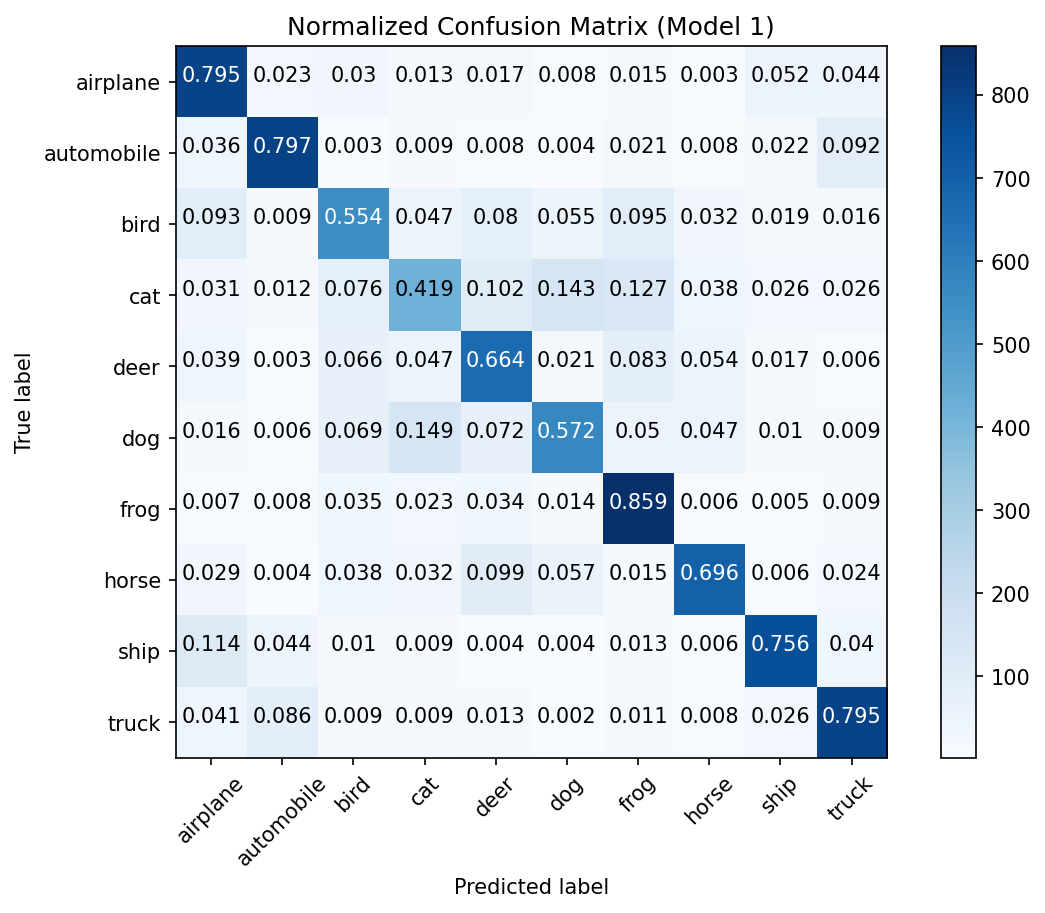

Normalized confusion matrix
[[0.72 0.03 0.07 0.02 0.02 0.   0.01 0.01 0.08 0.04]
 [0.02 0.83 0.01 0.01 0.   0.   0.01 0.01 0.03 0.07]
 [0.06 0.02 0.61 0.04 0.08 0.05 0.07 0.04 0.02 0.01]
 [0.02 0.02 0.12 0.4  0.07 0.14 0.14 0.06 0.03 0.02]
 [0.03 0.   0.1  0.03 0.61 0.03 0.06 0.1  0.01 0.01]
 [0.03 0.01 0.12 0.14 0.06 0.49 0.07 0.07 0.01 0.01]
 [0.   0.01 0.05 0.03 0.04 0.01 0.83 0.02 0.01 0.01]
 [0.01 0.01 0.05 0.02 0.06 0.04 0.02 0.74 0.   0.03]
 [0.07 0.06 0.01 0.01 0.   0.   0.01 0.01 0.79 0.03]
 [0.03 0.13 0.01 0.01 0.01 0.01 0.01 0.02 0.03 0.74]]


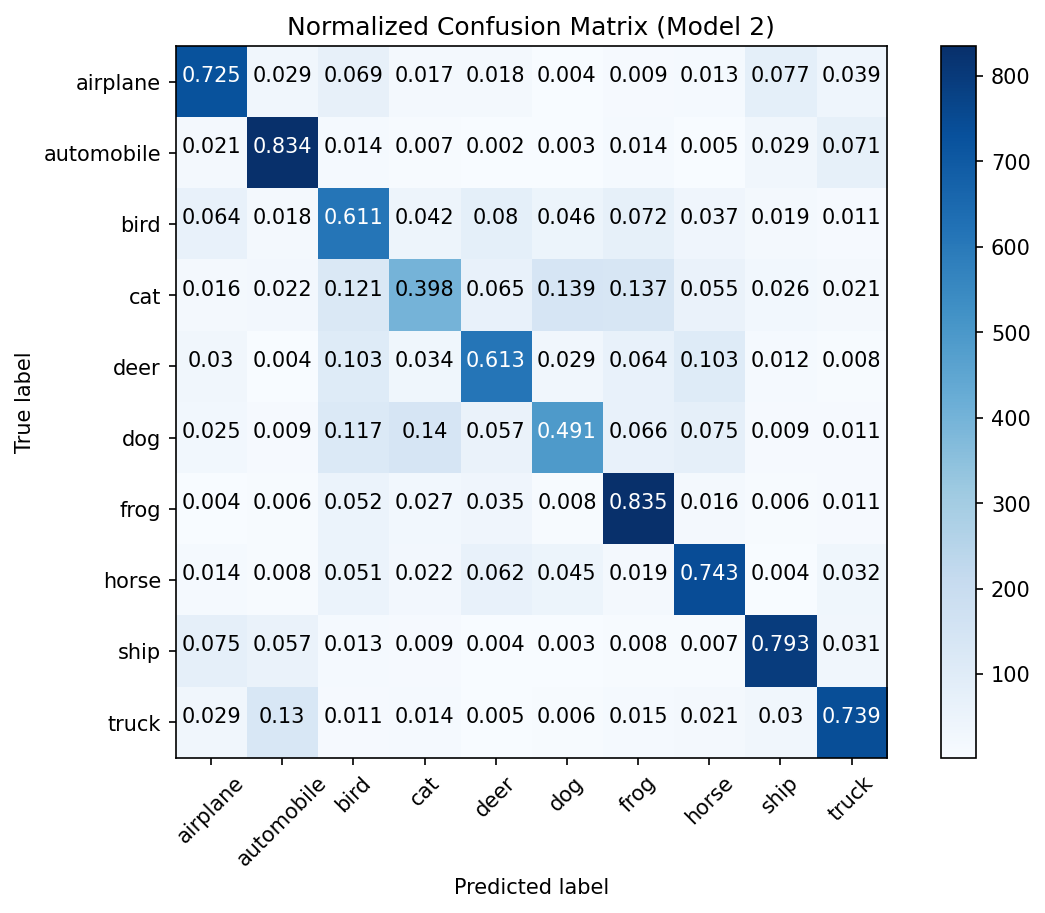

In [ ]:
# prompt: show confusion matrixes for the first and second models with normalization

# Plot normalized confusion matrix for model 1
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix1, classes=list(class_labels.values()), normalize=True,
                      title='Normalized Confusion Matrix (Model 1)')
plt.show()

# Plot normalized confusion matrix for model 2
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix2, classes=list(class_labels.values()), normalize=True,
                      title='Normalized Confusion Matrix (Model 2)')
plt.show()

Shape of weights: (4, 4, 3, 32)


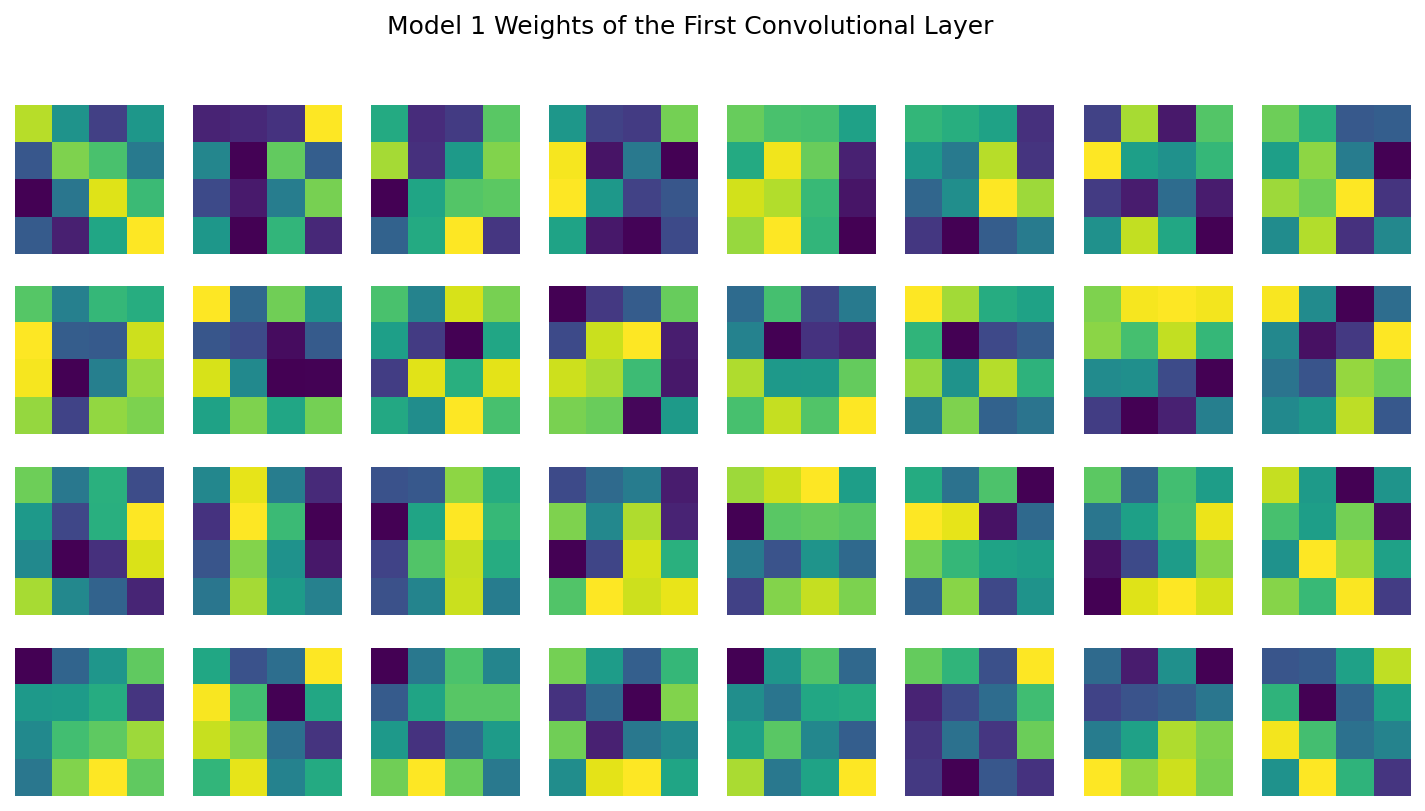

Shape of biases: (32,)


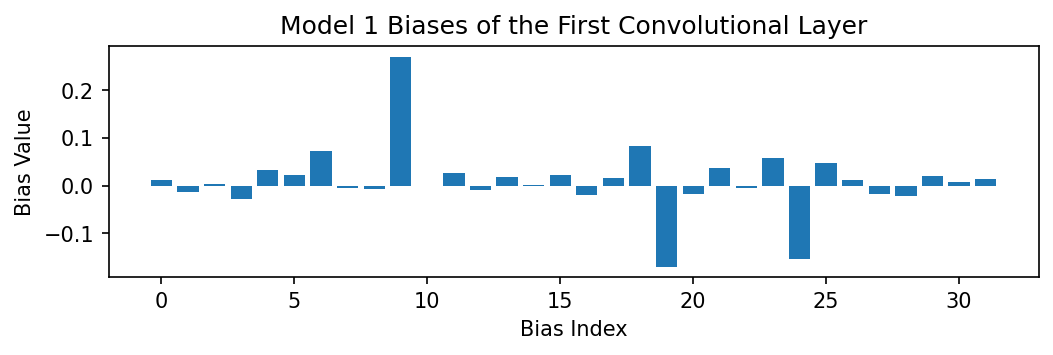

<ipython-input-98-f6b066a4881c>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f'Model 1 Original Image (Class: {class_labels[int(y_test[image_index])]})')


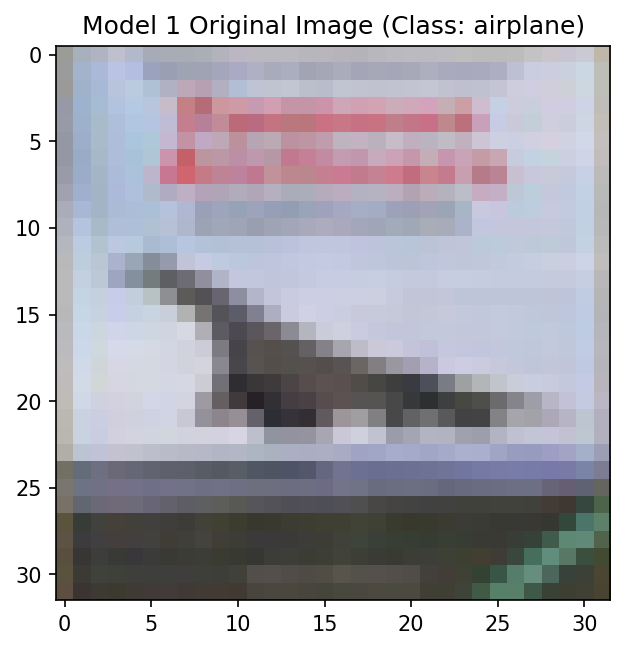

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted class: airplane
Confidence Scores:
airplane: 90.43%
automobile: 0.66%
bird: 0.00%
cat: 0.01%
deer: 0.01%
dog: 0.00%
frog: 0.01%
horse: 0.00%
ship: 8.82%
truck: 0.06%


In [ ]:
# prompt: show a color visualization of the layers, weight and biases in the first model and how they relate to class_labels

import matplotlib.pyplot as plt
import numpy as np

# Visualize the weights of the first convolutional layer
weights = model.layers[0].get_weights()[0]
print(f"Shape of weights: {weights.shape}")  # Output the shape

fig, axes = plt.subplots(4, 8, figsize=(12, 6))  # Adjust the subplot grid as needed
for i, ax in enumerate(axes.flat):
    if i < weights.shape[3]:
        ax.imshow(weights[:, :, 0, i], cmap='viridis') # Display the 0th channel of the weight
        ax.axis('off')
plt.suptitle('Model 1 Weights of the First Convolutional Layer')
plt.show()

# Visualize the biases of the first convolutional layer
biases = model.layers[0].get_weights()[1]
print(f"Shape of biases: {biases.shape}")  # Output the shape
plt.figure(figsize=(8, 2))
plt.bar(range(len(biases)), biases)
plt.xlabel('Bias Index')
plt.ylabel('Bias Value')
plt.title('Model 1 Biases of the First Convolutional Layer')
plt.show()

#Example visualization for a specific image (index 0):
image_index = 3
image = x_test[image_index]
plt.imshow(image)
plt.title(f'Model 1 Original Image (Class: {class_labels[int(y_test[image_index])]})')
plt.show()

# Get the predictions for the image
predictions = model.predict(np.expand_dims(image, axis=0))
predicted_class = np.argmax(predictions)
print(f'Predicted class: {class_labels[predicted_class]}')
print(f"Confidence Scores:")
for i in range(len(class_labels)):
    print(f"{class_labels[i]}: {predictions[0][i]*100:.2f}%")

Shape of weights: (4, 4, 3, 32)


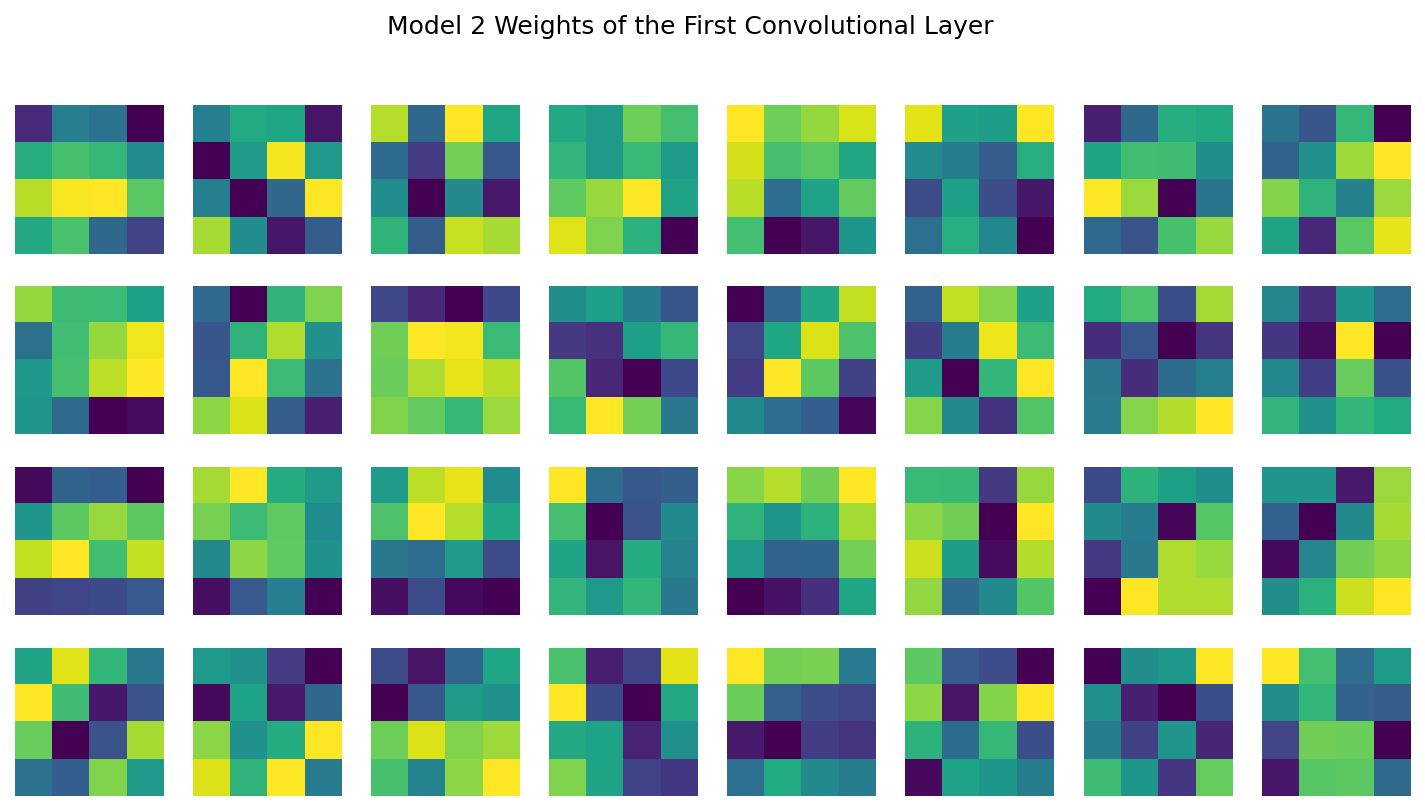

Shape of biases: (32,)


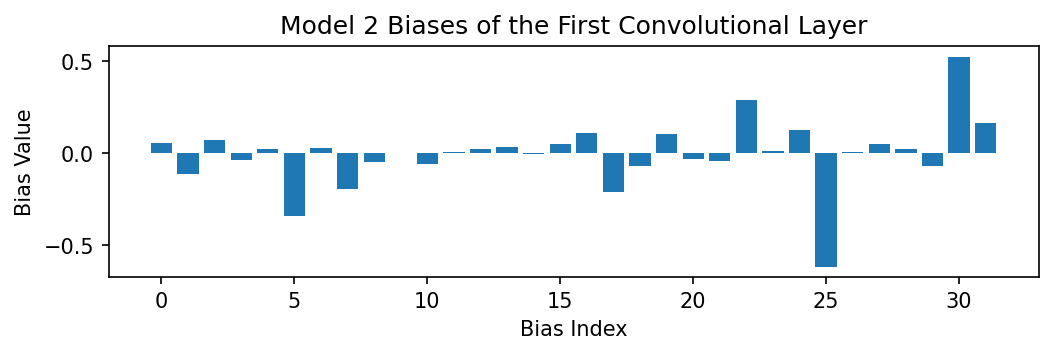

<ipython-input-99-dee897f9ea8a>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f'Model 2 Original Image (Class: {class_labels[int(y_test[image_index])]})')


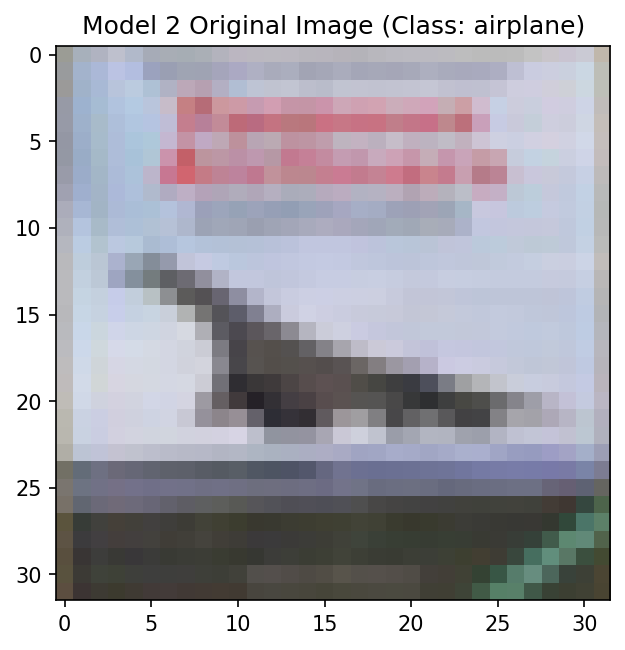

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: airplane
Confidence Scores:
airplane: 56.70%
automobile: 0.28%
bird: 0.45%
cat: 0.08%
deer: 0.38%
dog: 0.00%
frog: 0.01%
horse: 0.02%
ship: 41.82%
truck: 0.26%


In [ ]:
# prompt: show a color visualization of the layers, weight and biases in the second model and how they relate to class_labels

import matplotlib.pyplot as plt
import numpy as np

# Visualize the weights of the first convolutional layer
weights = model2.layers[0].get_weights()[0]
print(f"Shape of weights: {weights.shape}")  # Output the shape

fig, axes = plt.subplots(4, 8, figsize=(12, 6))  # Adjust the subplot grid as needed
for i, ax in enumerate(axes.flat):
    if i < weights.shape[3]:
        ax.imshow(weights[:, :, 0, i], cmap='viridis') # Display the 0th channel of the weight
        ax.axis('off')
plt.suptitle('Model 2 Weights of the First Convolutional Layer')
plt.show()

# Visualize the biases of the first convolutional layer
biases = model2.layers[0].get_weights()[1]
print(f"Shape of biases: {biases.shape}")  # Output the shape
plt.figure(figsize=(8, 2))
plt.bar(range(len(biases)), biases)
plt.xlabel('Bias Index')
plt.ylabel('Bias Value')
plt.title('Model 2 Biases of the First Convolutional Layer')
plt.show()

#Example visualization for a specific image (index 0):
image_index = 3
image = x_test[image_index]
plt.imshow(image)
plt.title(f'Model 2 Original Image (Class: {class_labels[int(y_test[image_index])]})')
plt.show()

# Get the predictions for the image
predictions = model2.predict(np.expand_dims(image, axis=0))
predicted_class = np.argmax(predictions)
print(f'Predicted class: {class_labels[predicted_class]}')
print(f"Confidence Scores:")
for i in range(len(class_labels)):
    print(f"{class_labels[i]}: {predictions[0][i]*100:.2f}%")

Shape of second conv layer weights: (4, 4, 32, 32)


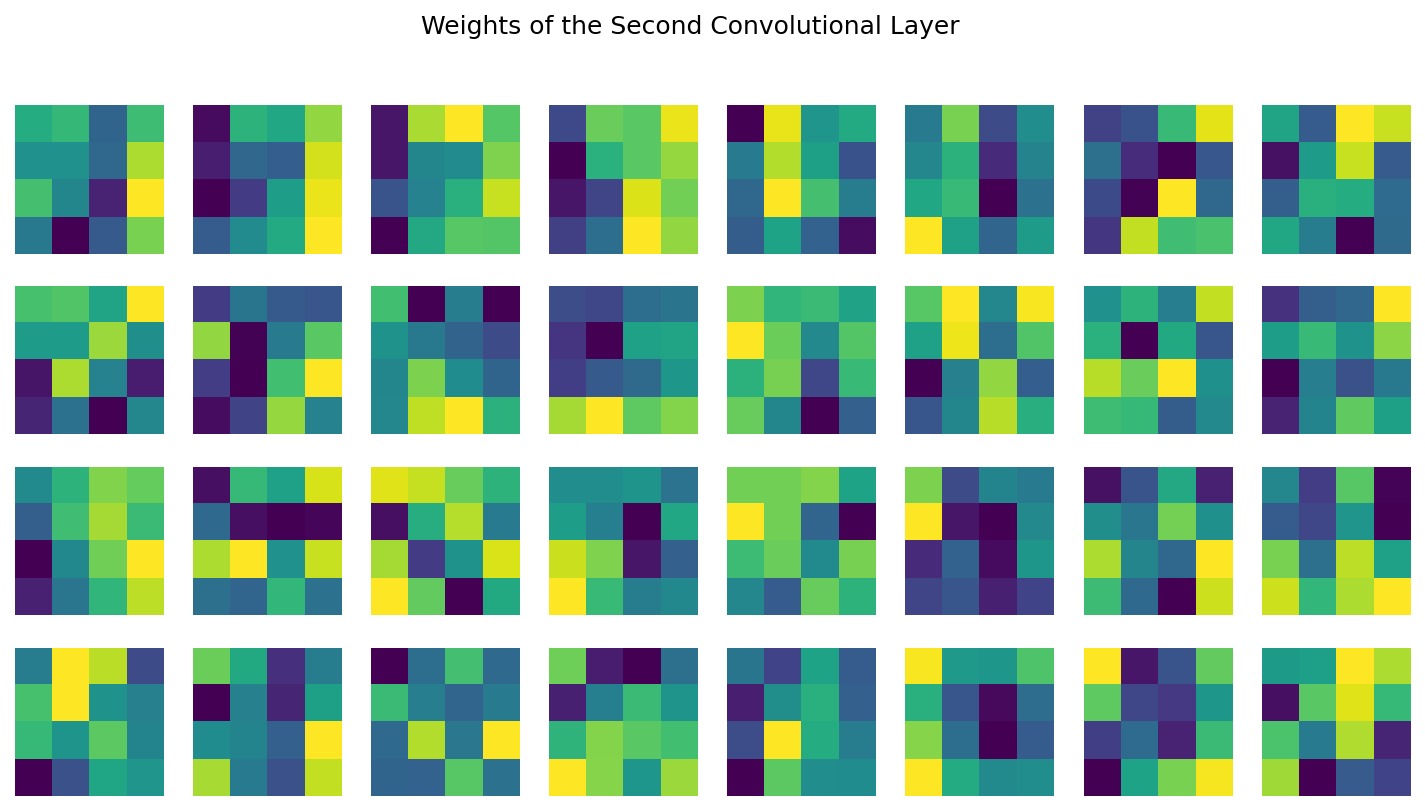

Shape of second conv layer biases: (32,)


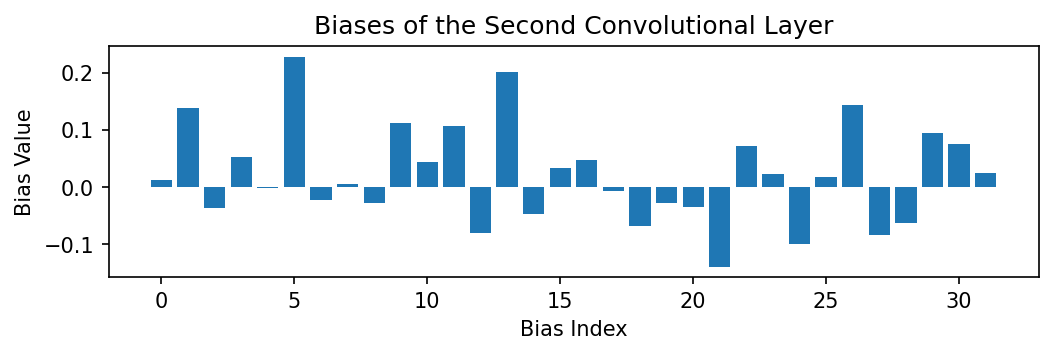

In [ ]:
# prompt: show a visualization of the second layer, weight and biases in the first model

# Visualize the weights of the second convolutional layer
weights_second_conv = model.layers[2].get_weights()[0]
print(f"Shape of second conv layer weights: {weights_second_conv.shape}")

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < weights_second_conv.shape[3]:
        ax.imshow(weights_second_conv[:, :, 0, i], cmap='viridis')
        ax.axis('off')
plt.suptitle('Weights of the Second Convolutional Layer')
plt.show()

# Visualize the biases of the second convolutional layer
biases_second_conv = model.layers[2].get_weights()[1]
print(f"Shape of second conv layer biases: {biases_second_conv.shape}")
plt.figure(figsize=(8, 2))
plt.bar(range(len(biases_second_conv)), biases_second_conv)
plt.xlabel('Bias Index')
plt.ylabel('Bias Value')
plt.title('Biases of the Second Convolutional Layer')
plt.show()

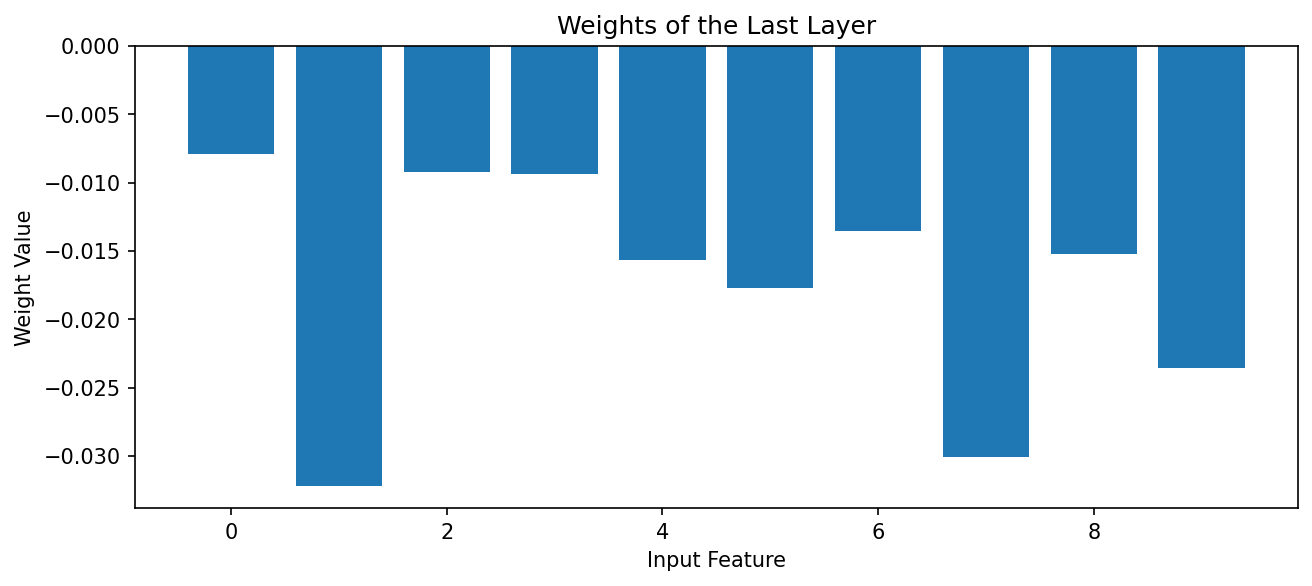

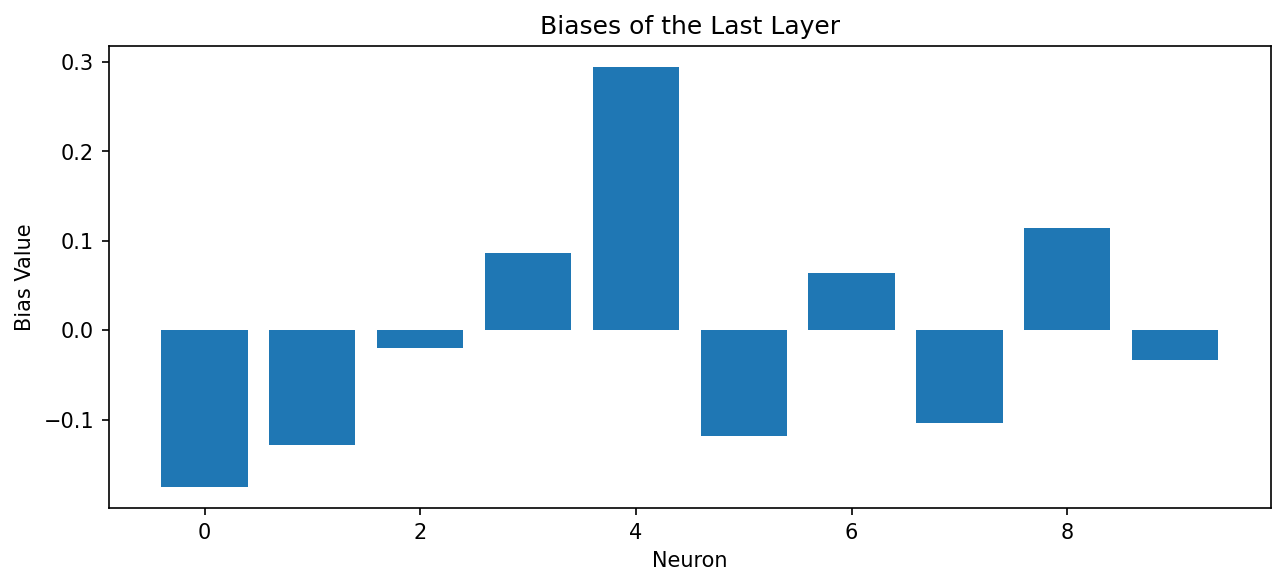

In [ ]:
# prompt: visualize the weights of the last layer and the biases of the last layer with a bar graph

import matplotlib.pyplot as plt

# Get the weights and biases of the last layer (Dense layer)
weights = model.layers[-1].get_weights()[0]
biases = model.layers[-1].get_weights()[1]

# Visualize the weights
plt.figure(figsize=(10, 4))
plt.bar(range(weights.shape[1]), np.mean(weights, axis=0)) #average across all neurons
plt.xlabel("Input Feature")
plt.ylabel("Weight Value")
plt.title("Weights of the Last Layer")
plt.show()

# Visualize the biases
plt.figure(figsize=(10, 4))
plt.bar(range(len(biases)), biases)
plt.xlabel("Neuron")
plt.ylabel("Bias Value")
plt.title("Biases of the Last Layer")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_test,predictions))


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step
              precision    recall  f1-score   support

           0       0.77      0.65      0.71      1000
           1       0.80      0.77      0.79      1000
           2       0.61      0.50      0.55      1000
           3       0.55      0.43      0.48      1000
           4       0.59      0.66      0.62      1000
           5       0.50      0.65      0.56      1000
           6       0.72      0.76      0.74      1000
           7       0.74      0.69      0.71      1000
           8       0.79      0.76      0.77      1000
           9       0.67      0.82      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [ ]:
# prompt: validate the first model's data with the test data

# Evaluate model 1 on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Model 1 Test Loss: {loss:.4f}")
print(f"Model 1 Test Accuracy: {accuracy:.4f}")

Model 1 Test Loss: 0.9514
Model 1 Test Accuracy: 0.6689
